In [ ]:
!pip install prophet

# Imports for everybody (packages and data)
import pandas as pd
import datetime as dt
from prophet import Prophet
from scipy.stats import linregress
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
url = 'https://api.github.com/repos/AsaAdomatis/project-1/contents/Runningback Salary Cap 2017-2018.csv'

# Fetch the file using the API
response = requests.get(url)

# Extract the file's content
if response.status_code == 200:
    file_url = response.json()['download_url']
    file_data = requests.get(file_url)

    # Read the CSV data into a pandas DataFrame
    from io import StringIO
    csv_data = StringIO(file_data.text)
    df = pd.read_csv(csv_data)

else:
    print("Failed to fetch file from GitHub API")

# THE DATAFRAME WITH THE ORIGINAL DATA IS CALLED df
df = df.drop('Unnamed: 0', axis=1)
display(df.head())

,Rank,Player,Age,Team,Games Played,Games Started,Attempts,Yards,Touchdowns,First Downs,...,Longest Run,Yards per Attempt,Yards per Game,Attempts per Game,Fumbles,Awards,Year,Position,Cap Hit,Cap%
0,1,Ezekiel Elliott,23,DAL,15.0,15.0,304.0,1434.0,6.0,74.0,...,41.0,4.7,95.6,20.3,6.0,"PB,AP-2",2018,RB,6806274,3.68
1,2,Saquon Barkley,21,NYG,16.0,16.0,261.0,1307.0,11.0,50.0,...,78.0,5.0,81.7,16.3,0.0,"PB,AP ORoY-1",2018,RB,5671773,3.19
2,3,David Johnson,27,ARI,16.0,16.0,258.0,940.0,7.0,51.0,...,53.0,3.6,58.8,16.1,3.0,NaN,2018,RB,5042344,2.82
3,4,Todd Gurley,24,LAR,14.0,14.0,256.0,1251.0,17.0,70.0,...,36.0,4.9,89.4,18.3,1.0,"PB,AP-1,AP OPoY-3",2018,RB,7228306,3.98
4,5,Adrian Peterson,33,WAS,16.0,16.0,251.0,1042.0,7.0,47.0,...,90.0,4.2,65.1,15.7,3.0,AP CPoY-3,2018,RB,630000,0.35


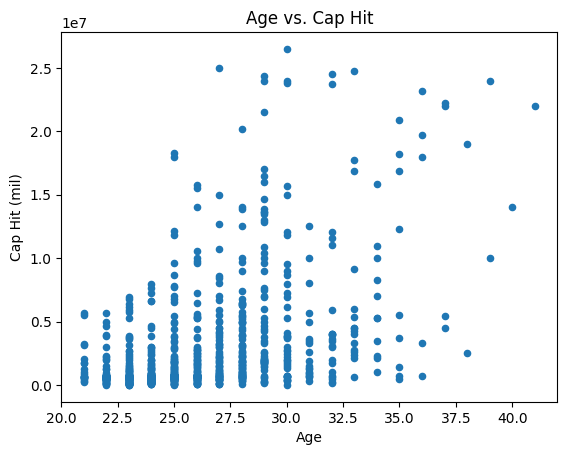

In [ ]:
# Create a Scatter regression Line for age v. salary (Dexter)
df.plot.scatter(x='Age', y='Cap Hit')
plt.title('Age vs. Cap Hit')
plt.xlabel('Age')
plt.ylabel('Cap Hit (mil)')
plt.show()

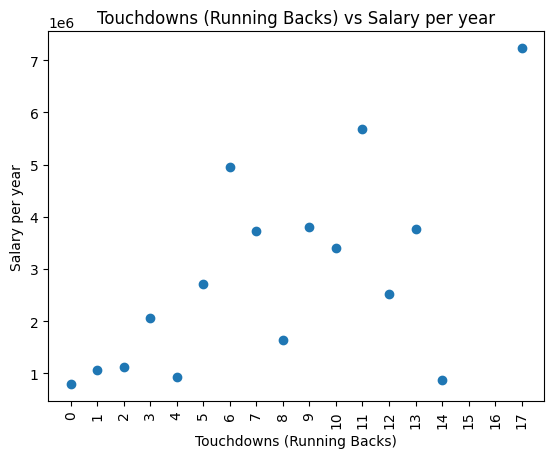

In [ ]:
# touchdowns v. salary (Gerardo)
# All positions
# import numpy as np
# # copy df
# df_TDvsCapHit = pd.DataFrame(
#     df.groupby("Touchdowns")["Cap Hit"]
#     .mean()
#     .sort_values(ascending= True)
#     .reset_index()
#     .copy())
# # assign correct types
# df_TDvsCapHit["Touchdowns"] = df_TDvsCapHit["Touchdowns"]
# df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].astype(float)
# # df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].apply(lambda x: f"${x:,.2f}")
# x_values = df_TDvsCapHit["Touchdowns"]
# y_values = df_TDvsCapHit["Cap Hit"]
# y_min = 0
# y_max = y_values.max()
# y_ticks = np.arange(y_min, y_max, 500000)
# plt.scatter(x_values,y_values)
# x_range = np.arange(x_values.min(), x_values.max() + 1)
# plt.title("Amount of touchdowns vs Salary per year")
# plt.xlabel("Touchdowns")
# plt.ylabel("Salary per year")
# plt.xticks(ticks=x_range, rotation=90)
# plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
# plt.show()

# touchdowns v. salary (Gerardo)
# Only RB
import numpy as np
# copy df
df_RB = df[df['Position'] == 'RB']
df_TDvsCapHit = pd.DataFrame(
    df_RB.groupby("Touchdowns")["Cap Hit"]
    .mean()
    .sort_values(ascending= True)
    .reset_index()
    .copy())
# assign correct types
df_TDvsCapHit["Touchdowns"] = df_TDvsCapHit["Touchdowns"]
df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].astype(float)
# df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].apply(lambda x: f"${x:,.2f}")
x_values = df_TDvsCapHit["Touchdowns"]
y_values = df_TDvsCapHit["Cap Hit"]



y_min = 0
y_max = y_values.max()
y_ticks = np.arange(y_min, y_max, 500000)
plt.scatter(x_values,y_values)
x_range = np.arange(x_values.min(), x_values.max() + 1)
plt.title("Touchdowns (Running Backs) vs Salary per year")
plt.xlabel("Touchdowns (Running Backs)")
plt.ylabel("Salary per year")
plt.xticks(ticks=x_range, rotation=90)
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.show()

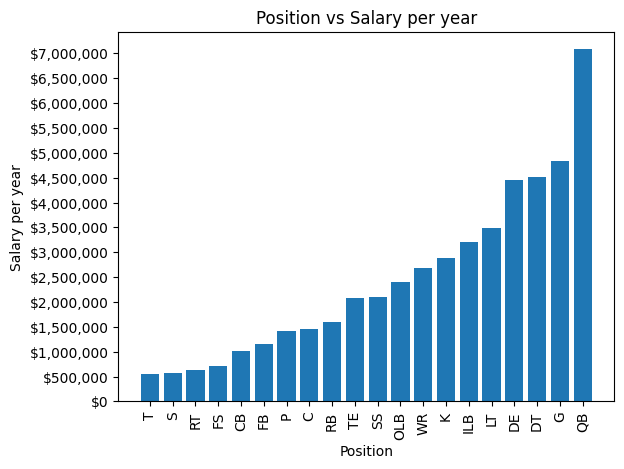

In [ ]:
# position v. salary (Gerardo)
df_PosvsCapHit = pd.DataFrame(
    df.groupby("Position")["Cap Hit"]
    .mean()
    .sort_values(ascending= True)
    .reset_index()
    .copy())
df_PosvsCapHit["Cap Hit"] = df_PosvsCapHit["Cap Hit"].astype(float)
y_min = 0
y_max = y_values.max()
y_ticks = np.arange(y_min, y_max, 500000)
x_values = df_PosvsCapHit['Position']
y_values = df_PosvsCapHit['Cap Hit']
plt.bar(x_values,y_values)
plt.title("Position vs Salary per year")
plt.xlabel("Position")
plt.ylabel("Salary per year")
plt.xticks(rotation=90)
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.show()

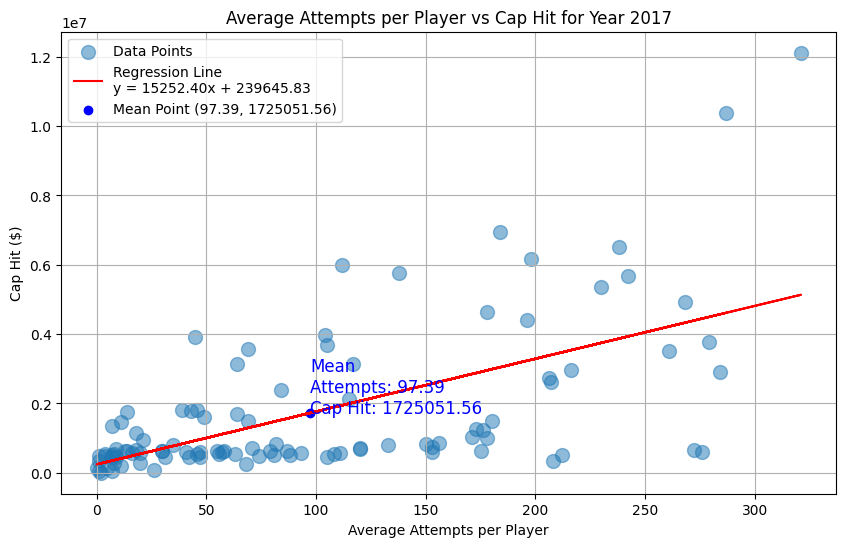

Year 2017 - R-value: 0.6120
Year 2017 - R-squared value: 0.3746
Year 2017 - P-value: 0.0000


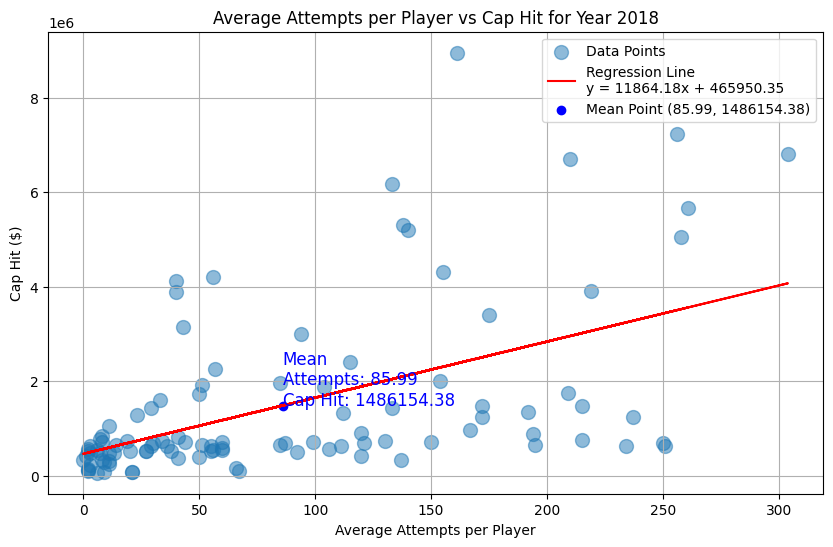

Year 2018 - R-value: 0.5233
Year 2018 - R-squared value: 0.2739
Year 2018 - P-value: 0.0000


In [ ]:
# rush attempts v. salary (Tony)
# Start: Part 2: Visualization 1: 2017 and 2018 Individual Year Visualizations: Avg. Rush Attempts v. Salary, scatter, regression line
"""
I) Pearson Correlation Coeffiecient rvalue Guide:
####################################################
rvalue of .45 is a positive correlation, but since less than 1,
it is a weaker positive correlation. If rvalue < 0.3, it is small to no correlation.
Rvalue of .4 to .5, is considered mild correlation. rvalue of .5 to 1 is considered
a strong correlation.

II)Fit of Determination Guide:
####################################################
R-Squared indicates the proportion of variance (how far the data is from the mean)
in the model. The closer R-squared is to 1, the better the model explains a large
portion of the data.

III) Significance Guide:
####################################################
The pvalue indicates whether the regression relationship is statistically significant.
The pvalue tests the null hypothesis that the slope of the regression line is zero
(no relationship). A small pvalue (typically  p < 0.05 ) suggests that the
relationship is statistically significant, meaning there is evidence of a linear
association between x_values and y_values.

####################################################
# 2017 Analysis:
####################################################
Combined running back rushing attempts and salary data are grouped
by Year, Player, and Position to calculate the average Rushing Attempts and Cap
Hit per player for the season. The annotation near the regression line highlights
the mean rushing attempts and mean cap hit for all players during that season.
The regression line is computed using the formula  y = mx + b , representing the
best linear fit for the data. This line helps predict the Cap Hit based on a given
number of Rushing Attempts.
####################################################
	1.	Pearson Correlation Coefficient (r-value): The Pearson correlation coefficient
  of 0.6120 indicates a moderate positive correlation between “Rushing Attempts”
  and “Cap Hit.” This suggests that there is a moderate relationship between the
  number of rushing attempts and the associated cap hit for players in 2017.
	2.	Fit of Determination (R-squared): The R-squared value of 0.3746 implies that
  approximately 37.46% of the variance in “Cap Hit” can be explained by “Rushing
  Attempts.” This is a notable percentage, indicating a moderate degree of fit
  between the two variables.
	3.	Data Significance: The p-value of 0.0000 (p < 0.05) indicates that the
  relationship between “Rushing Attempts” and “Cap Hit” is statistically
  significant. This suggests that the correlation observed is not due to random
  chance and is meaningful within the context of the data.

2018 Analysis:
####################################################
	1. The Pearson correlation coefficient of 0.5233 indicates a moderate positive
  correlation between “Rushing Attempts” and “Cap Hit.” This suggests a moderate
  relationship where an increase in rushing attempts is somewhat associated with
  an increase in the cap hit for players in 2018.
	2.	Fit of Determination (R-squared): The R-squared value of 0.2739 implies
  that approximately 27.39% of the variance in “Cap Hit” can be explained by
  “Rushing Attempts.” This represents a more meaningful relationship than what
  was seen in 2017, but still leaves a significant portion of the variance
  unexplained.
	3.	Data Significance: The p-value of 0.0000 (p < 0.05) indicates that the
  relationship between “Rushing Attempts” and “Cap Hit” is statistically
  significant. This suggests that the correlation observed is not due to random
  chance and that there is a notable relationship between the two variables in 2018.
"""
# Step 1: Request Running Back Stats
rb_data_url = "https://github.com/AsaAdomatis/project-1/raw/refs/heads/main/Runningback%20Salary%20Cap%202017-2018.csv"

df_rb_stats_salary_2017_2018 = pd.DataFrame()

response = requests.get(rb_data_url)
if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_rb_stats_salary_2017_2018 = pd.read_csv(csv_content)
else:
    print("Failed to fetch file from GitHub API")

# Step 2: Drop the 'Unnamed: 0' column from the DataFrame
df_rb_stats_salary_2017_2018 = df_rb_stats_salary_2017_2018.drop(columns=['Unnamed: 0'])

# Step 3: Check the data
# display(len(df_rb_stats_salary_2017_2018))
# display(df_rb_stats_salary_2017_2018.head())
# display(df_rb_stats_salary_2017_2018.columns)

# Step 4: Prepare data by grouping by Year and Player, calculating sum (for one year is the Attempts and Cap Hits)
player_year_data = df_rb_stats_salary_2017_2018.groupby(["Year", "Player", "Position"]).agg({
    "Attempts": "sum",
    "Cap Hit": "sum"
}).sort_values("Player", ascending=False).reset_index()

# Step 4A: Iterate through each year (2017-2018) and plot the data
unique_years = np.sort(player_year_data["Year"].unique())
# display(unique_years)

# Create a plot for each year
for year in unique_years:
    # Filter data for the current year
    year_data = player_year_data[player_year_data["Year"] == year]
     # x_values = year_data["Attempts"]
    x_values = year_data.loc[year_data['Position'] == 'RB']['Attempts']
    # y_values = year_data["Cap Hit"]
    y_values = year_data.loc[year_data['Position'] == 'RB']['Cap Hit']

    # Perform regression analysis
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, s=100, alpha=0.5, label="Data Points")
    plt.plot(x_values, regress_values, color="red", label=f"Regression Line\n{line_eq}")

    # Mark the mean point
    mean_x = x_values.mean()
    mean_y = y_values.mean()

    # Rushing Attempts and Cap Salary Annotation
    plt.scatter(mean_x, mean_y, color="blue",label=f"Mean Point ({mean_x:.2f}, {mean_y:.2f})")

    # Add labels and title
    plt.xlabel("Average Attempts per Player")
    plt.ylabel("Cap Hit ($)")
    plt.title(f"Average Attempts per Player vs Cap Hit for Year {year}")

    # Annotate the mean values ( plot the mean x_value and y_values)
    plt.text(mean_x + 0.05, mean_y, f"Mean\nAttempts: {mean_x:.2f}\nCap Hit: {mean_y:.2f}", fontsize=12, color="blue")

    # Add regression equation annotation at a reasonable location
    # plt.annotate(line_eq, (x_values.min() + 5, y_values.max() - 10), fontsize=12, color="red")

    # Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print R-squared value for this year's regression
    print(f"Year {year} - R-value: {rvalue:.4f}")
    print(f"Year {year} - R-squared value: {rvalue**2:.4f}")
    print(f"Year {year} - P-value: {pvalue:.4f}")

<ipython-input-7-fa07e36a090b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_player_year_data["Year"] = filtered_player_year_data["Year"].apply(convert_year_to_date)


Filtered Data:


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp353iv3mb/zly57wti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp353iv3mb/r1onb4b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81507', 'data', 'file=/tmp/tmp353iv3mb/zly57wti.json', 'init=/tmp/tmp353iv3mb/r1onb4b5.json', 'output', 'file=/tmp/tmp353iv3mb/prophet_modeln5qe6hhu/prophet_model-20241217000132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:01:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:01:32 - cmdstanpy - INFO - Chain

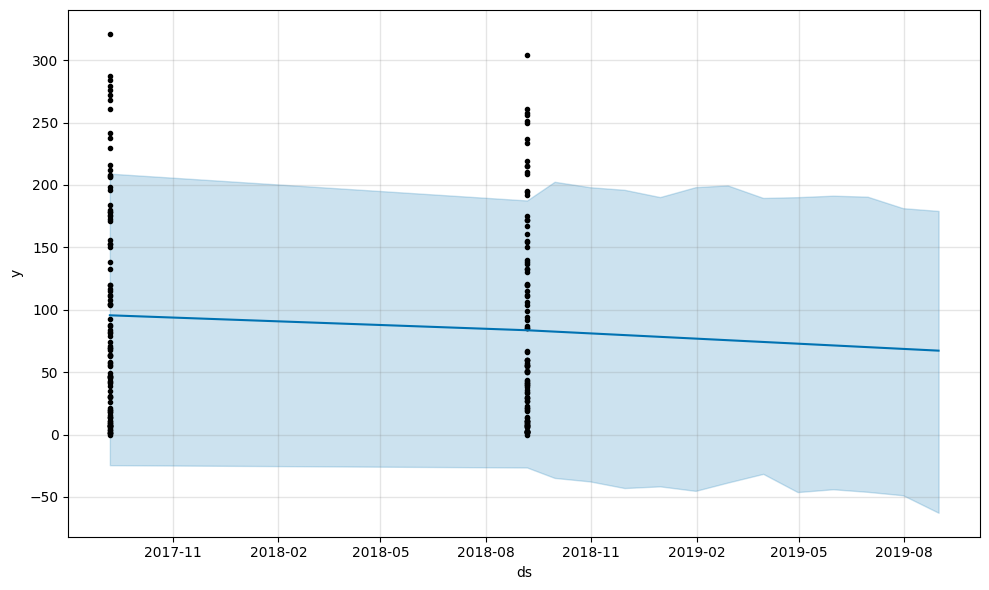

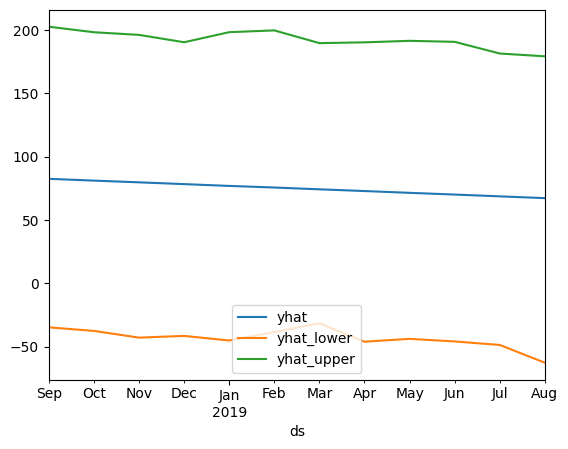

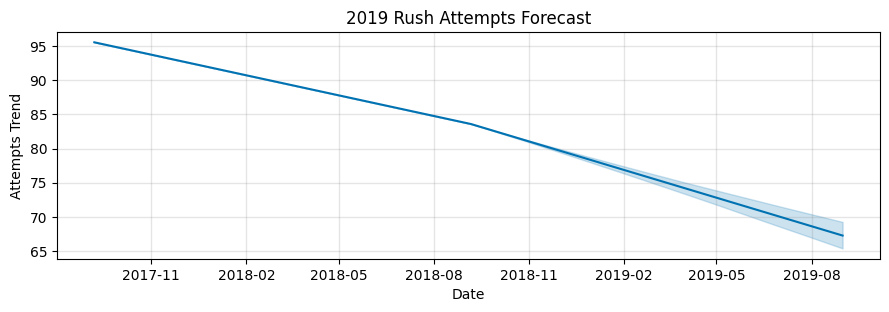

In [ ]:
# rush attempts future predictions (Tony)
#################################################################
# Prep data for Plot the predictions: Filter by Year and Attempts
#################################################################

filtered_player_year_data = player_year_data[["Year", "Attempts", "Position", "Player"]]


# Covert year to date
def convert_year_to_date(year):
    if year == 2017:
        return pd.to_datetime('2017-09-07')
                  #  return pd.to_datetime('2017')

    elif year == 2018:
        return pd.to_datetime('2018-09-06')
                # return pd.to_datetime('2018')

    else:
        # Handle other years or raise an error
        raise ValueError("Year must be 2017 or 2018")

filtered_player_year_data["Year"] = filtered_player_year_data["Year"].apply(convert_year_to_date)
# filtered_player_year_data['Year'] = filtered_player_year_data['Year'].astype('string')
filtered_player_year_data.reset_index(inplace=True, drop=True)

# Filter the DataFrame to only include rows where the Position is 'RB'
filtered_player_year_data = filtered_player_year_data[filtered_player_year_data['Position'] == 'RB']
# display(filtered_player_year_data.head())

# Prepare training data
filtered_player_year_data.columns = ["ds", "y", "Position", "Player"]
filtered_player_year_data = filtered_player_year_data.dropna()

print("Filtered Data:")
# display(filtered_player_year_data.head())

# Create Prophet Model
prophet_model = Prophet()
# display(prophet_model)

# Step 1: Fit Profit Mode:
prophet_model.fit(filtered_player_year_data)

# Step 2: Create  a future DataFrame to hold predictions, Make the prediction go our as far as a year
future_nfl_rushing_df = prophet_model.make_future_dataframe(periods=12, freq='M')
# display(future_nfl_rushing_df.tail())

# Step 3: Build a table of future predictions:
forecast_nfl_rushing_trends = prophet_model.predict(future_nfl_rushing_df)

# Filter data by date:
forecast_nfl_rushing_trends[(forecast_nfl_rushing_trends['ds'] >= '2016-01-01') & (forecast_nfl_rushing_trends['ds'] <= '2020-01-01')]
# print("FORECAST HEAD:")
# display(forecast_nfl_rushing_trends.head())


# Step 4: Plot the Prophet model predictions:
# prophet_model.plot(forecast_nfl_rushing_trends);

# Generate the Prophet plot
fig = prophet_model.plot(forecast_nfl_rushing_trends)

################################################
# Step 5: Plot the Trends for the last 12 months:
################################################
# Set Index:
forecast_nfl_rushing_trends = forecast_nfl_rushing_trends.set_index('ds')

# print("FORECAST TAIL:")

pd.set_option('display.max_rows', None)
# display(forecast_nfl_rushing_trends.tail(5))
"""
Analysis: The upper and lower bounds indicate a slight decrease in rushing
attempts for 2019, whereas the best-case prediction suggests a consistent
number of attempts, aligning with the previous two years.
"""
forecast_nfl_rushing_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-12:,:].plot()


#####################################################################
# Step 6: Plot_components to visualize the nfl_rushing_trends forecast
######################################################################
"""
Analysis: The prophet trend indicates a steady decline in the modeled rush attempts over
the observed period. If the trend line continues as shown, it suggests that rush attempts
in 2019 are expected to decrease further compared to 2018.
"""
forecast_nfl_rushing_trends = forecast_nfl_rushing_trends.reset_index()
fig1 = prophet_model.plot_components(forecast_nfl_rushing_trends)

plt.title("2019 Rush Attempts Forecast")
plt.xlabel('Date')
plt.ylabel('Attempts Trend')
plt.show()

In [ ]:
# Description: Scrape and Merge Running Back Position and Rushing data (Tony)
####################################
# Step 1: Scrape the 2017 Rushing Data
#####################################
# Step 1a: Get Position Data
###################################################################################################################
# pos_url = "https://stathead.com/football/player-season-finder.cgi?request=1&year_min=2017&year_max=2017&positions%5B%5D=rb"
pos_url = "https://github.com/tlockhart/project-1/raw/refs/heads/main/Cleaning%20Code/Resources/df_2017_rb_positions.csv"


response = requests.get(pos_url)
df_2017_NFL_positions = pd.DataFrame()

if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_2017_NFL_positions = pd.read_csv(csv_content)

else:
    print("Failed to fetch file from GitHub API")


df_2017_NFL_positions['Player'] = df_2017_NFL_positions['Player'].str.strip().astype("string")
df_2017_NFL_positions = df_2017_NFL_positions.rename(columns={"Team": "Tm"})

# pd.set_option('display.max_rows', None)
# print("2017 Positions")
# display(df_2017_NFL_positions.info())
# display(df_2017_NFL_positions.head())


# df_2017_NFL_positions = df_2017_NFL_positions.sort_values("Rk", ascending=True).reset_index(drop=True)

# pos_url = "https://stathead.com/football/player-season-finder.cgi?request=1&year_min=2018&year_max=2018&positions%5B%5D=rb"
pos_url = "https://github.com/tlockhart/project-1/raw/refs/heads/main/Cleaning%20Code/Resources/df_2018_rb_positions.csv"


response = requests.get(pos_url)
df_2018_NFL_positions = pd.DataFrame()

if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_2018_NFL_positions = pd.read_csv(csv_content)

else:
    print("Failed to fetch file from GitHub API")

# print("2018 Positions")

df_2018_NFL_positions['Player'] = df_2018_NFL_positions['Player'].str.strip().astype("string")
df_2018_NFL_positions = df_2018_NFL_positions.rename(columns={"Team": "Tm"})

# pd.set_option('display.max_rows', None)
# display(df_2018_NFL_positions.info())
# display(df_2018_NFL_positions.head())

# pos_url = "https://stathead.com/football/player-season-finder.cgi?request=1&year_min=2019&year_max=2019&positions%5B%5D=rb"
pos_url = "https://github.com/tlockhart/project-1/raw/refs/heads/main/Cleaning%20Code/Resources/df_2019_rb_positions.csv"


response = requests.get(pos_url)
df_2019_NFL_positions = pd.DataFrame()

if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_2019_NFL_positions = pd.read_csv(csv_content)

else:
    print("Failed to fetch file from GitHub API")

# print("2019 Positions")
df_2019_NFL_positions['Player'] = df_2019_NFL_positions['Player'].str.strip().astype("string")
df_2019_NFL_positions = df_2019_NFL_positions.rename(columns={"Team": "Tm"})

# pd.set_option('display.max_rows', None)
# display(df_2019_NFL_positions.info())
# display(df_2019_NFL_positions.head())

#############################################################
# Step 2: Scrape 2017 Rushing Data and store in a data frame
############################################################
#################################
# Step 2a: Start Scraping 2017 Data
##################################
# base_url = "https://www.nfl.com/stats/player-stats/category/rushing/2017/REG/all/rushingyards/DESC"

# # Initialize an empty list to store data from all pages
# all_data = []

# def scrape_data(all_data, base_url):
#   # Pagination cursor
#   aftercursor = None

#   while True:
#       # Construct the URL with the cursor
#       url = base_url
#       if aftercursor:
#           url = f"{base_url}?aftercursor={aftercursor}"

#       # Fetch the page
#       print(f"Fetching data from: {url}")
#       response = requests.get(url)
#       response.raise_for_status()  # Raise an error if the request fails

#       # Parse the HTML page
#       soup = BeautifulSoup(response.text, 'html.parser')

#       # Extract the table using pandas
#       tables = pd.read_html(response.text)
#       if not tables or tables[0].empty:
#           print("No more data to fetch.")
#           break

#       # Append the current page data to the list
#       all_data.append(tables[0])

#       # Locate the "Next Page" button to get the next cursor
#       next_button = soup.find("a", class_="nfl-o-table-pagination__next")
#       if next_button and "aftercursor=" in next_button['href']:
#           aftercursor = next_button['href'].split("aftercursor=")[-1]
#       else:
#           break  # Exit the loop if there's no next page
#       print("Data scraping complete!")

# # Call Scraper:
# scrape_data(all_data, base_url)

# # Combine all the pages into a single DataFrame
# df_all_data = pd.concat(all_data, ignore_index=True)

# # Save the data to a CSV file
# df_all_data.to_csv("nfl_rb_pos_rushing_stats_2017.csv", index=False)

#################################
# Step 2b: Load 2017 Scraped Data
##################################
url_2017_rushing = "https://github.com/tlockhart/project-1/raw/refs/heads/main/Cleaning%20Code/Resources/nfl_rb_pos_rushing_stats_2017.csv"
response = requests.get(url_2017_rushing)
df_2017_NFL_Rushing = pd.DataFrame()

if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_2017_NFL_Rushing = pd.read_csv(csv_content)

else:
    print("Failed to fetch file from GitHub API")

# Check columns before Flattening
# display(df_2017_NFL_Rushing.columns)

# Merge rushing and position data
def combine_position_rush(rushing_df, position_df, merged_df, year):
  # Strip out blank spaces
  # rushing_df.columns = rushing_df.columns.str.strip()
  rushing_df = rushing_df.rename(columns={"Team": "Tm",
                                          "Att" : "Attempts"})

  rushing_df['Player'] = rushing_df['Player'].str.strip().astype("string")

  # Add Year
  rushing_df["Year"] = year
  rushing_df = rushing_df.reset_index(drop=True)

  # print("rushing_df:")
  # display(rushing_df.info())
  # display(rushing_df.head(5))
  # display(rushing_df.tail(5))
  # display(rushing_df.columns)
  # display(position_df.columns)

  # Merge DataFrames on Player and Tm
  merged_df = pd.merge(
      rushing_df,
      position_df[['Player', 'Tm', 'Pos']],  # Only keep relevant columns
      on=['Player'],  # Merge keys
      how='right'  # Use 'left' to keep all rows from Rushing Data
  )


  # Filter out rows where 'Pos' is NaN (meaning no matching position found)
  merged_df = merged_df.dropna(subset=['Pos'])
  merged_df = merged_df.dropna(subset=['Attempts'])
  # Display the merged DataFrame
  return merged_df

merged_df = pd.DataFrame()

df_2017_merged = combine_position_rush(df_2017_NFL_Rushing, df_2017_NFL_positions, merged_df, '2017').sort_values("Player")
# Display the merged DataFrame
print("Combined 2017 Data with Pos:")
# display(df_2017_merged.info())
display(df_2017_merged.head())
display(df_2017_merged.tail())


# CHECK FOR DUPLICATE PLAYERS
# # Step 1: Identify all duplicate rows based on the 'Player' column
# duplicate_players = df_2017_merged[df_2017_merged.duplicated(subset=['Player'], keep=False)]

# # Step 2: Count occurrences of duplicate players
# duplicate_player_count = duplicate_players['Player'].value_counts()

# # Step 3: Display duplicate players and their counts
# print("Duplicate Players Count:")
# print(duplicate_player_count)

# # Optional Step 4: Display the rows containing duplicate players
# print("\nRows with Duplicate Players:")
# print(duplicate_players)

# file = Path("./output/2017_nfl_rushing.csv")
# df_2017_NFL_Rushing.to_csv(file, index=False)

#############################################################
# Step 3: Scrape 2018 Rushing Data and store in a data frame
############################################################
#################################
# Step 3a: Start Scraping 2018 Data
#################################
# base_url = "https://www.nfl.com/stats/player-stats/category/rushing/2018/REG/all/rushingyards/DESC"

# # Initialize an empty list to store data from all pages
# all_data = []

# # Pagination cursor
# aftercursor = None

# # Call Scraper:
# scrape_data(all_data, base_url)


# # Combine all the pages into a single DataFrame
# df_all_data = pd.concat(all_data, ignore_index=True)

# # Save the data to a CSV file
# df_all_data.to_csv("nfl_rb_pos_rushing_stats_2018.csv", index=False)

########################################################
# Step 3b: Load 2018 Scraped Data
########################################################
url_2018_rushing = "https://github.com/tlockhart/project-1/raw/refs/heads/main/Cleaning%20Code/Resources/nfl_rb_pos_rushing_stats_2018.csv"
response = requests.get(url_2018_rushing)
df_2018_NFL_Rushing = pd.DataFrame()

if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_2018_NFL_Rushing = pd.read_csv(csv_content)

else:
    print("Failed to fetch file from GitHub API")

# Call Function to Merge Data
df_2018_merged = combine_position_rush(df_2018_NFL_Rushing, df_2018_NFL_positions, merged_df,'2018').sort_values("Player")

# Display the merged DataFrame
print("Combined 2018 Data with Pos:")
# display(df_2018_merged.info())
display(df_2018_merged.head())
display(df_2018_merged.tail())

# file = Path("./output/2018_nfl_rushing.csv")
# df_2018_NFL_Rushing.to_csv(file, index=False)

#############################################################
# Step 4: Scrape 2019 Rushing Data and store in a data frame
############################################################
##########################
# Step 4a: Start Scraping 2019 Data
##########################
# base_url = "https://www.nfl.com/stats/player-stats/category/rushing/2019/REG/all/rushingyards/DESC"

# # Initialize an empty list to store data from all pages
# all_data = []

# # Pagination cursor
# aftercursor = None

# # Call Scraper:
# scrape_data(all_data, base_url)

# # Combine all the pages into a single DataFrame
# df_all_data = pd.concat(all_data, ignore_index=True)

# # Save the data to a CSV file
# df_all_data.to_csv("nfl_rb_pos_rushing_stats_2019.csv", index=False)

#########################################
# Step 4b: Load 2019 Scraped Data
#########################################
url_2019_rushing = "https://github.com/tlockhart/project-1/raw/refs/heads/main/Cleaning%20Code/Resources/nfl_rb_pos_rushing_stats_2019.csv"
response = requests.get(url_2019_rushing)
df_2019_NFL_Rushing = pd.DataFrame()

if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_2019_NFL_Rushing = pd.read_csv(csv_content)

else:
    print("Failed to fetch file from GitHub API")

# Call Function to Merge Data
df_2019_merged = combine_position_rush(df_2019_NFL_Rushing, df_2019_NFL_positions, merged_df, '2019')

# CHECK FOR DUPLICATE PLAYERS
# # Step 1: Identify all duplicate rows based on the 'Player' column
# duplicate_players = df_2019_merged[df_2019_merged.duplicated(subset=['Player'], keep=False)]

# # Step 2: Count occurrences of duplicate players
# duplicate_player_count = duplicate_players['Player'].value_counts()

# # Step 3: Display duplicate players and their counts
# print("Duplicate Players Count:")
# print(duplicate_player_count)

# # Optional Step 4: Display the rows containing duplicate players
# print("\nRows with Duplicate Players:")
# print(duplicate_players)

# Display the merged DataFrame
print("Combined 2019 Data with Pos:")
# print(df_2019_merged.info())
display(df_2019_merged.head())
display(df_2019_merged.tail())

# file = Path("./output/2019_nfl_rushing.csv")
# df_2019_NFL_Rushing.to_csv(file, index=False)


Combined 2017 Data with Pos:


,Player,Rush Yds,Attempts,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM,Year,Tm,Pos
49,Aaron Jones,448.0,81.0,4.0,6.0,1.0,46.0,21.0,25.9,0.0,2017,GNB,RB
129,Aaron Ripkowski,13.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2017,GNB,RB
53,Adrian Peterson,529.0,156.0,2.0,2.0,0.0,27.0,20.0,12.8,3.0,2017,ARINOR,RB
128,Akeem Hunt,23.0,8.0,0.0,0.0,0.0,11.0,1.0,12.5,0.0,2017,KAN,RB
15,Alex Collins,973.0,212.0,6.0,6.0,1.0,50.0,51.0,24.1,2.0,2017,BAL,RB


,Player,Rush Yds,Attempts,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM,Year,Tm,Pos
130,Tyler Ervin,12.0,4.0,0.0,0.0,0.0,6.0,1.0,25.0,0.0,2017,HOU,RB
50,Wayne Gallman,476.0,111.0,0.0,2.0,0.0,24.0,19.0,17.1,3.0,2017,NYG,RB
82,Wendell Smallwood,174.0,47.0,1.0,2.0,0.0,26.0,9.0,19.2,0.0,2017,PHI,RB
117,Zach Line,28.0,7.0,0.0,0.0,0.0,9.0,5.0,71.4,0.0,2017,NOR,RB
118,Zach Zenner,26.0,14.0,1.0,0.0,0.0,14.0,2.0,14.3,0.0,2017,DET,RB


Combined 2018 Data with Pos:


,Player,Rush Yds,Attempts,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM,Year,Tm,Pos
22,Aaron Jones,728.0,133.0,8.0,4.0,1.0,67.0,41.0,30.8,1.0,2018,GNB,RB
15,Adrian Peterson,1042.0,251.0,7.0,5.0,3.0,90.0,47.0,18.7,2.0,2018,WAS,RB
97,Alex Armah,15.0,9.0,2.0,0.0,0.0,4.0,3.0,33.3,0.0,2018,CAR,FB
38,Alex Collins,411.0,114.0,7.0,0.0,0.0,19.0,22.0,19.3,3.0,2018,BAL,RB
48,Alfred Blue,499.0,150.0,2.0,0.0,0.0,17.0,25.0,16.7,0.0,2018,HOU,RB


,Player,Rush Yds,Attempts,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM,Year,Tm,Pos
82,Trenton Cannon,113.0,38.0,1.0,1.0,0.0,21.0,7.0,18.4,0.0,2018,NYJ,RB
84,Wayne Gallman,176.0,51.0,1.0,0.0,0.0,9.0,7.0,13.7,0.0,2018,NYG,RB
41,Wendell Smallwood,364.0,87.0,3.0,0.0,0.0,15.0,22.0,25.3,1.0,2018,PHI,RB
91,Zach Line,41.0,9.0,0.0,0.0,0.0,9.0,6.0,66.7,0.0,2018,NOR,RB
66,Zach Zenner,265.0,55.0,3.0,1.0,0.0,29.0,14.0,25.4,0.0,2018,DET,RB


Combined 2019 Data with Pos:


,Player,Rush Yds,Attempts,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM,Year,Tm,Pos
0,Christian McCaffrey,1387.0,287.0,15.0,6.0,4.0,84.0,56.0,19.5,1.0,2019,CAR,RB
1,Derrick Henry,1540.0,303.0,16.0,9.0,3.0,74.0,73.0,24.1,5.0,2019,TEN,RB
2,Aaron Jones,1084.0,236.0,16.0,5.0,2.0,56.0,55.0,23.3,2.0,2019,GNB,RB
3,Ezekiel Elliott,1357.0,301.0,12.0,4.0,0.0,33.0,78.0,25.9,3.0,2019,DAL,RB
4,Dalvin Cook,1135.0,250.0,13.0,7.0,2.0,75.0,60.0,24.0,3.0,2019,MIN,RB


,Player,Rush Yds,Attempts,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM,Year,Tm,Pos
147,Tony Brooks-James,7.0,8.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2019,PIT,RB
148,De'Lance Turner,6.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2019,MIA,RB
150,Alfred Morris,4.0,1.0,0.0,0.0,0.0,4.0,1.0,100.0,0.0,2019,ARI,RB
152,Senorise Perry,3.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2019,BUF,RB
153,James Develin,3.0,2.0,0.0,0.0,0.0,2.0,1.0,50.0,0.0,2019,NWE,RB


In [ ]:
# Official NFL Statistics: Running Back Actual 2017-2019 Mean Rushing Attempts (Tony)
"""
Analysis: The Prophet Prediction of a gradual decrease in Rushing Attempts in 2019 was
not accurate.  The NFL Official Statistics indicates a slight uptick in Attempts.
This smaller change from 2018 to 2019 indicates a potential stabilization
in Rushing Attempts among running backs.

Predictions based on past data are influenced by trends, but they are not always
guaranteed to align with future outcomes because other variables might play a role.
The profit prediction underestimated the variability and complexity of how rushing
attempts might evolve in the league. The NFL often shifts strategies based on
competitive dynamics. For example, teams might have shifted toward passing in 2018,
only to balance out their strategies with the run game in 2019.

"""
# Step 5: Calculate the mean rushing attempts for RBs in 2017, 2018, and 2019
mean_attempts_2017 = df_2017_merged['Attempts'].mean()
mean_attempts_2018 = df_2018_merged['Attempts'].mean()
mean_attempts_2019 = df_2019_merged['Attempts'].mean()

# Step 6: Calculate the differences to see if there was a decline over the years
decline_2017_2018 = mean_attempts_2017 - mean_attempts_2018
decline_2018_2019 = -1 * (mean_attempts_2018 - mean_attempts_2019)

# Display the results
print(f"Mean Rushing Attempts in 2017 (RB): {mean_attempts_2017:.2f}")
print(f"Mean Rushing Attempts in 2018 (RB): {mean_attempts_2018:.2f}")
print(f"Mean Rushing Attempts in 2019 (RB): {mean_attempts_2019:.2f}")
print(f"Decline in Mean Rushing Attempts from 2017 to 2018: {decline_2017_2018:.2f}")
print(f"Increase in Mean Rushing Attempts from 2018 to 2019: {decline_2018_2019:.2f}")


Mean Rushing Attempts in 2017 (RB): 80.49
Mean Rushing Attempts in 2018 (RB): 75.56
Mean Rushing Attempts in 2019 (RB): 76.02
Decline in Mean Rushing Attempts from 2017 to 2018: 4.93
Increase in Mean Rushing Attempts from 2018 to 2019: 0.46


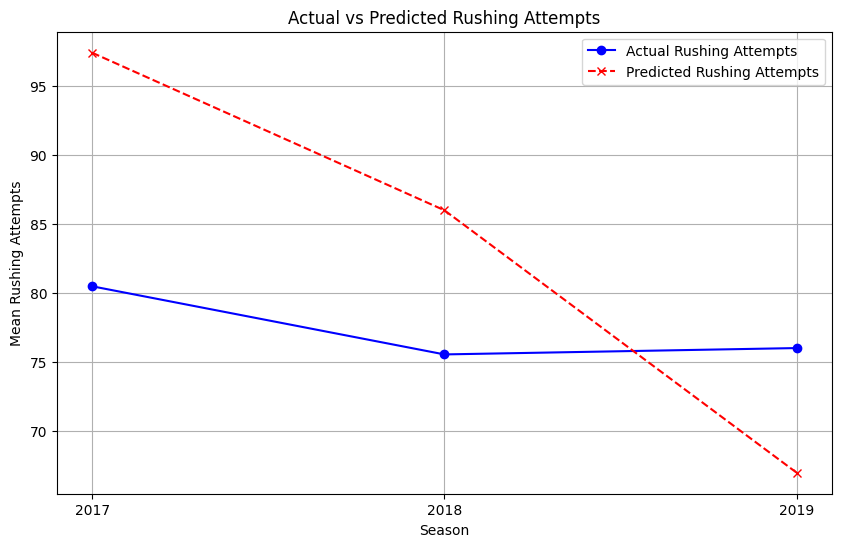

In [ ]:
# 2017-2019 Actual Rushing Attempts (Tony)
# Data: Actual Rushing Attempts for each year
years = ['2017', '2018', '2019']
actual_rushing_attempts = [80.49, 75.56, 76.02]

# Predicted trends (for example, linear interpolation between the points)
predicted_rushing_attempts = [97.39, 85.99, 67]  # Just assuming linear trends

# Plotting the actual and predicted trends
plt.figure(figsize=(10, 6))

# Actual Rushing Attempts Line
plt.plot(years, actual_rushing_attempts, marker='o', color='blue', label='Actual Rushing Attempts')

# Predicted Rushing Attempts Line
plt.plot(years, predicted_rushing_attempts, marker='x', color='red', linestyle='--', label='Predicted Rushing Attempts')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Mean Rushing Attempts')
plt.title('Actual vs Predicted Rushing Attempts')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

'Overall R-value: 0.5325'

'Overall R-squared value: 0.2835'

'Overall P-value: 0.0000'

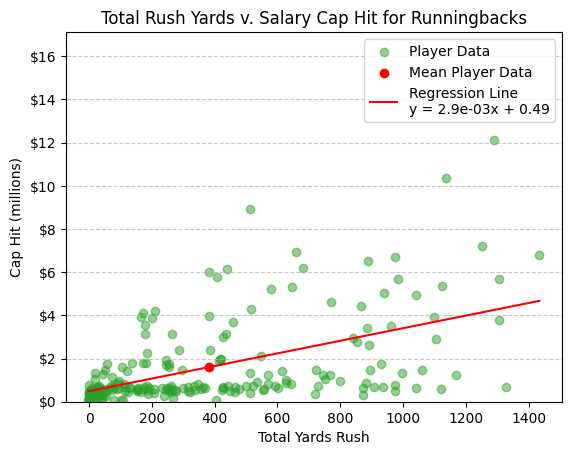

In [ ]:
# rush yards v. salary (Asa)
df_2017 = df[(df['Year'] >= 2017) & (df['Position'] == 'RB')]
x = df_2017['Yards']
y = [x / 1000000 for x in df_2017['Cap Hit']]
y_max = max(y) + 5
y_ticks = np.arange(0, y_max, 2)

# plotting the graph
plt.xlabel("Total Yards Rush")
plt.ylabel("Mean Cap Hit (millions)")
plt.title("Total Rush Yards v. Salary Cap Hit for Runningbacks")
plt.ylabel('Cap Hit (millions)')
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.ylim(0, y_max)
plt.scatter(x, y, alpha=0.5, color='tab:green', label='Player Data')

# plotting mean point
mean_x = np.mean(x)
mean_y = np.mean(y)
plt.scatter(mean_x, mean_y, color="red", label=f"Mean Player Data")

# plot regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.1e}x + {intercept:.2f}"
plt.plot(x, regress_values, color="red", label=f"Regression Line\n{line_eq}")



# plotting legends and other niceties
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# print R-squared values and other important values
display(f"Overall R-value: {rvalue:.4f}")
display(f"Overall R-squared value: {rvalue**2:.4f}")
display(f"Overall P-value: {pvalue:.4f}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp353iv3mb/2a2pahwr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp353iv3mb/82f1mu4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79785', 'data', 'file=/tmp/tmp353iv3mb/2a2pahwr.json', 'init=/tmp/tmp353iv3mb/82f1mu4w.json', 'output', 'file=/tmp/tmp353iv3mb/prophet_model6nfespdl/prophet_model-20241217000139.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:01:39 - cmdstanpy - INFO - Chain [1] start processing
IN

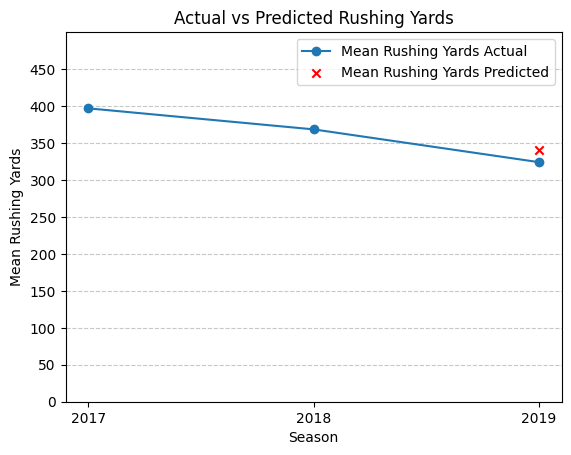

,ds,y
0,2017-01-01,396.893204
1,2018-01-01,368.436893
2,2019-01-01,324.048951


340.0585629052738

In [ ]:
# rush yards v. salary + predictions (Asa)
# getting the data points
mean_yards_2017 = df.loc[(df['Year'] == 2017) & (df['Position'] == 'RB')]['Yards'].mean()
mean_yards_2018 = df.loc[(df['Year'] == 2018) & (df['Position'] == 'RB')]['Yards'].mean()
mean_yards_2019 = df_2019_merged['Rush Yds'].mean()

# creating the base dataframe
yards_by_year = {'ds': ['2017-01-01', '2018-01-01'], 'y': [mean_yards_2017, mean_yards_2018]}
yards_by_year_df = pd.DataFrame(yards_by_year)
yards_by_year_df['ds'] = pd.to_datetime(yards_by_year_df['ds'])

# running a prophet prediction
model = Prophet()
model.fit(yards_by_year_df)
future_yards = model.make_future_dataframe(periods=1, freq='Y')
forecast = model.predict(future_yards)

# creating actual df
yards_by_year_df.loc[2] = ['2019-01-01', mean_yards_2019]
yards_by_year_df['ds'] = pd.to_datetime(yards_by_year_df['ds'])

# creating predicted df
predicted_2019 = forecast.iloc[2, :]['yhat']
yards_by_year_predicted_df = yards_by_year_df.copy()
yards_by_year_predicted_df.loc[2] = ['2019-01-01', predicted_2019]
yards_by_year_predicted_df['ds'] = pd.to_datetime(yards_by_year_predicted_df['ds'])

# graphing actual
years = [2017, 2018, 2019]
plt.plot(years, yards_by_year_df['y'], marker='o', label='Mean Rushing Yards Actual')

# graphing predicted
plt.scatter(2019, predicted_2019, marker='x', color='red', label='Mean Rushing Yards Predicted')

# adding labels and ticks
plt.xlabel('Season')
plt.xticks(ticks=years)

plt.ylabel('Mean Rushing Yards')
plt.ylim(0, 500)
y_ticks = np.arange(0, 500, 50)
plt.yticks(y_ticks)
plt.title('Actual vs Predicted Rushing Yards')

# Add a legend
plt.legend()

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# show the data
display(yards_by_year_df)
display(predicted_2019)

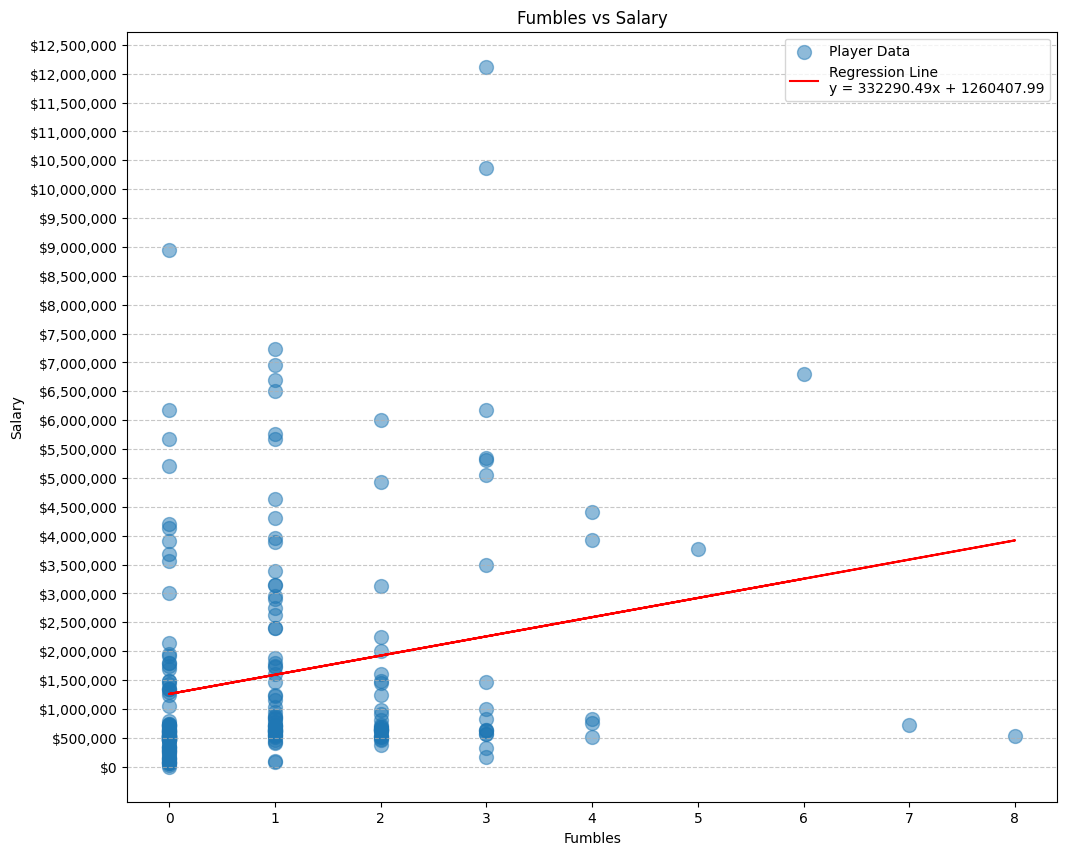

Overall R-value: 0.2216
Overall R-squared value: 0.0491
Overall P-value: 0.0014


In [ ]:
# Fumbles vs. Salary (Whoever finishes first)
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
df_RB = df[df['Position'] == 'RB']
df_FumblevsCapHit = df_RB[["Fumbles", "Cap Hit"]].copy()
df_FumblevsCapHit["Cap Hit"] = df_FumblevsCapHit["Cap Hit"].astype(float)

# Extract x and y values
x_values = df_FumblevsCapHit["Fumbles"]
y_values = df_FumblevsCapHit["Cap Hit"]

# Regression Line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot
plt.figure(figsize=(12, 10))  # Single figure
plt.scatter(x_values, y_values, s=100, alpha=0.5, label="Player Data")  # Scatter plot
plt.plot(x_values, regress_values, color="red", label=f"Regression Line\n{line_eq}")  # Regression line

# Configure axis
y_min = 0
y_max = y_values.max() + 500000  # Add buffer
y_ticks = np.arange(y_min, y_max, 500000)
x_ticks = np.arange(int(x_values.min()), int(x_values.max()) + 1)

plt.title("Fumbles vs Salary")
plt.xlabel("Fumbles")
plt.ylabel("Salary")
plt.xticks(ticks=x_ticks)
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])

# Add legend and grid
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print R-squared value
print(f"Overall R-value: {rvalue:.4f}")
print(f"Overall R-squared value: {rvalue**2:.4f}")
print(f"Overall P-value: {pvalue:.4f}")

In [ ]:
# Award Type by Cap Hit (Asa) p1
# grabbing the dataframe with the updated awards
url = 'https://api.github.com/repos/AsaAdomatis/project-1/contents/Runningback Salary Cap 2017-2018 w Awards.csv'

# Fetch the file using the API
response = requests.get(url)

# Extract the file's content
if response.status_code == 200:
    file_url = response.json()['download_url']
    file_data = requests.get(file_url)

    # Read the CSV data into a pandas DataFrame
    from io import StringIO
    csv_data = StringIO(file_data.text)
    awards_df = pd.read_csv(csv_data)

else:
    print("Failed to fetch file from GitHub API")

awards_df = awards_df.drop('Unnamed: 0', axis=1)
awards_df.head(5)

,Rank,Player,Age,Team,Games Played,Games Started,Attempts,Yards,Touchdowns,First Downs,...,Position,Cap Hit,Cap%,PB,AP,ORoY,OPoY,CPoY,MVP,Total Awards
0,1,Ezekiel Elliott,23,DAL,15.0,15.0,304.0,1434.0,6.0,74.0,...,RB,6806274,3.68,1,2,0,0,0,0,3
1,2,Saquon Barkley,21,NYG,16.0,16.0,261.0,1307.0,11.0,50.0,...,RB,5671773,3.19,1,1,1,0,0,0,3
2,3,David Johnson,27,ARI,16.0,16.0,258.0,940.0,7.0,51.0,...,RB,5042344,2.82,0,0,0,0,0,0,0
3,4,Todd Gurley,24,LAR,14.0,14.0,256.0,1251.0,17.0,70.0,...,RB,7228306,3.98,1,1,0,3,0,0,5
4,5,Adrian Peterson,33,WAS,16.0,16.0,251.0,1042.0,7.0,47.0,...,RB,630000,0.35,0,1,0,0,3,0,4


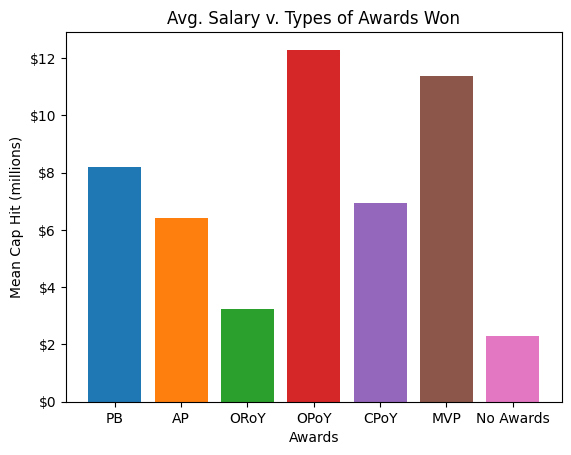

In [ ]:
# Award Type by Cap Hit (Asa) p2
# For each award get group avg. add it to a dictionary
possible_awards = ['PB', 'AP', 'ORoY', 'OPoY', 'CPoY', 'MVP']
avg_amount = []

for award in possible_awards:
    receivers_df = awards_df.loc[awards_df[award] >= 1]
    #display(receivers_df.head())
    avg = round(float(receivers_df['Cap Hit'].mean()), 2)
    avg_amount.append(avg)

# adding players with no awards
possible_awards.append('No Awards')
awardless_df = awards_df.loc[awards_df['Total Awards'] == 0]
avg = round(float(awardless_df['Cap Hit'].mean()), 2)
avg_amount.append(avg)

# convert y to millions
avg_amount_millions = [x / 1000000 for x in avg_amount]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
plt.bar(possible_awards, avg_amount_millions, color=colors)
plt.xlabel("Awards")
plt.ylabel("Mean Cap Hit (millions)")
plt.title("Avg. Salary v. Types of Awards Won")
y_max = max(avg_amount_millions)
y_ticks = np.arange(0, y_max, 2)
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.show()

'Overall R-value: 0.2782'

'Overall R-squared value: 0.0774'

'Overall P-value: 0.0000'

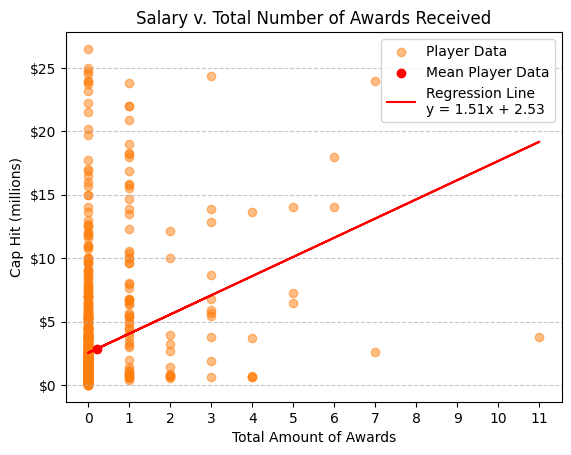

In [ ]:
 # Total Awards Won v. Cap Hit (Asa)

# cleaning up total awards vs. salary
x = awards_df['Total Awards']
x_ticks = np.arange(0, max(x)+1, 1)
y = [x / 1000000 for x in awards_df['Cap Hit']]
y_ticks = np.arange(0, max(y) + 10, 5)

# plotting the graph
plt.xlabel("Total Amount of Awards")
plt.ylabel("Mean Cap Hit (millions)")
plt.title("Salary v. Total Number of Awards Received")
plt.ylabel('Cap Hit (millions)')
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.xticks(ticks=x_ticks)
plt.scatter(x, y, alpha=0.5, color='tab:orange', label='Player Data')

# plotting mean Point
mean_x = np.mean(x)
mean_y = np.mean(y)
plt.scatter(mean_x, mean_y, color="red", label=f"Mean Player Data")

# regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x, regress_values, color="red", label=f"Regression Line\n{line_eq}")



# Plotting legends and other niceties
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# print R-squared value
display(f"Overall R-value: {rvalue:.4f}")
display(f"Overall R-squared value: {rvalue**2:.4f}")
display(f"Overall P-value: {pvalue:.4f}")

'Overall R-value: 0.2532'

'Overall R-squared value: 0.0641'

'Overall P-value: 0.0002'

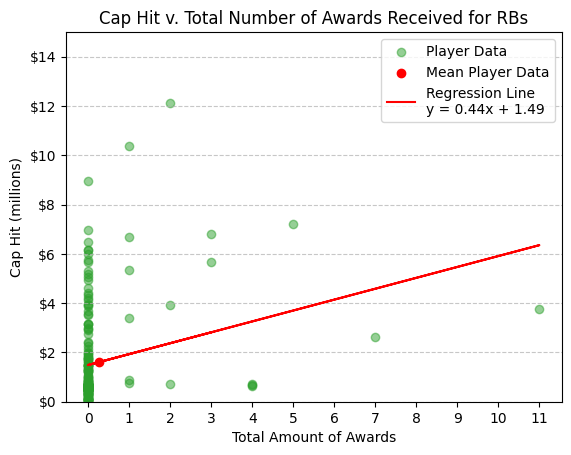

In [ ]:
# Total Awards v. Cap Salary Hit for Running Backs (Asa)

# cleaning up total awards vs. salary for runningbacks only
runningback_award_winners = awards_df.loc[(awards_df['Position'] == 'RB')  & (awards_df['Total Awards'] >= 0)]
x = runningback_award_winners['Total Awards']
x_ticks = np.arange(0, max(x)+1, 1)
y = runningback_award_winners['Cap Hit'] / 1000000
y_max = 15
y_ticks = np.arange(0, y_max, 2)

# plotting the graph
plt.xlabel("Total Amount of Awards")
plt.ylabel("Mean Cap Hit (millions)")
plt.title("Cap Hit v. Total Number of Awards Received for RBs")
plt.ylabel('Cap Hit (millions)')
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.ylim(0, y_max)
plt.xticks(ticks=x_ticks)
plt.scatter(x, y, alpha=0.5, color='tab:green', label='Player Data')

# plotting mean Point
mean_x = np.mean(x)
mean_y = np.mean(y)
plt.scatter(mean_x, mean_y, color="red", label=f"Mean Player Data")

# regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(x, regress_values, color="red", label=f"Regression Line\n{line_eq}")

# Plotting legends and other niceties
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# print R-squared value
display(f"Overall R-value: {rvalue:.4f}")
display(f"Overall R-squared value: {rvalue**2:.4f}")
display(f"Overall P-value: {pvalue:.4f}")